📊 Dataset Preview:
   Match_ID Team Opponent  Toss_Won  Batting_First  Team_Runs  Team_Wickets  \
0         1  KKR       MI         1              0        124             7   
1         2   RR      KKR         1              0        139             3   
2         3  RCB      KKR         1              1        127             4   
4         5   RR       MI         0              1        195             4   
5         6  CSK      RCB         1              1        120             6   

   Team_Batting_Avg  Match_Won  
0         31.832263          1  
1         25.731368          1  
2         22.289973          1  
4         34.130191          1  
5         38.545133          1  

🏏 Average Team Runs based on Toss Result:
    Toss_Won   Team_Runs
0  Lost Toss  169.822394
1   Won Toss  164.755459


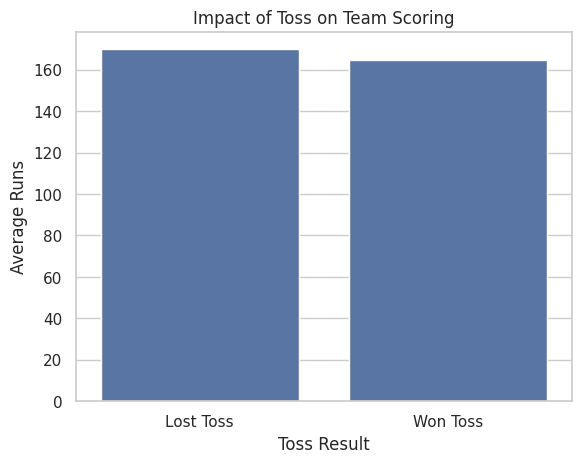


🏆 Winning Percentage based on Toss Result:
    Toss_Won  Win_Percentage
0  Lost Toss       55.984556
1   Won Toss       55.458515


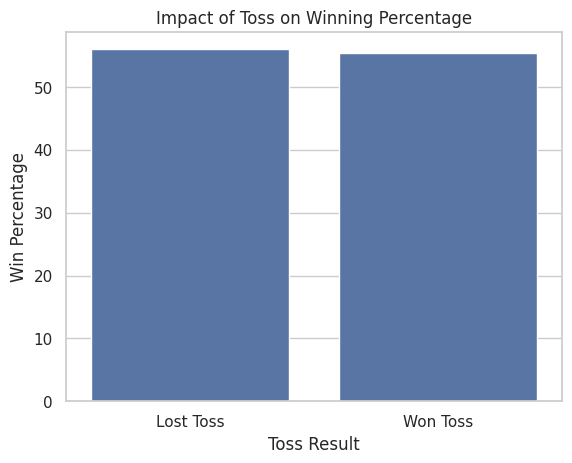


📈 Team Batting Average vs Win Percentage:
  Team  Team_Batting_Avg  Match_Won  Win_Percentage
0  CSK         32.136443   0.650000       65.000000
1  KKR         33.069338   0.500000       50.000000
2   MI         33.861579   0.483146       48.314607
3  RCB         34.367211   0.554054       55.405405
4   RR         32.286175   0.608108       60.810811
5  SRH         34.125560   0.573333       57.333333


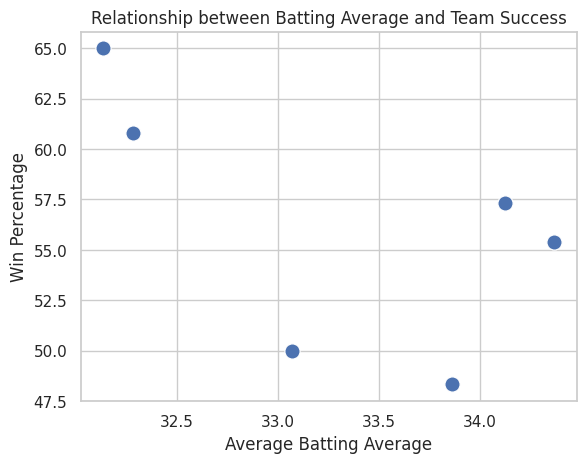


📎 Correlation between Batting Average and Win Percentage:
                  Team_Batting_Avg  Win_Percentage
Team_Batting_Avg          1.000000       -0.587682
Win_Percentage           -0.587682        1.000000


In [1]:
# ---------------------------------------------------------------
# Practical no 7: Team Analysis in Cricket using Python
# ---------------------------------------------------------------

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# ---------------------------------------------------------------
# Step 1: Create a large synthetic cricket match dataset
# ---------------------------------------------------------------

np.random.seed(42)

teams = ["MI", "CSK", "RCB", "KKR", "RR", "SRH"]
matches = 600   # Large dataset

data = {
    "Match_ID": range(1, matches + 1),
    "Team": np.random.choice(teams, matches),
    "Opponent": np.random.choice(teams, matches),
    "Toss_Won": np.random.choice([0, 1], matches),   # 1 = Toss won
    "Batting_First": np.random.choice([0, 1], matches),
    "Team_Runs": np.random.randint(120, 220, matches),
    "Team_Wickets": np.random.randint(3, 10, matches),
    "Team_Batting_Avg": np.random.uniform(22, 45, matches),
    "Match_Won": np.random.choice([0, 1], matches, p=[0.45, 0.55])
}

df = pd.DataFrame(data)

# Ensure team ≠ opponent
df = df[df["Team"] != df["Opponent"]]

print("📊 Dataset Preview:")
print(df.head())

# ---------------------------------------------------------------
# Step 2: Impact of Toss on Team Scoring
# ---------------------------------------------------------------

toss_scoring = df.groupby("Toss_Won")["Team_Runs"].mean().reset_index()
toss_scoring["Toss_Won"] = toss_scoring["Toss_Won"].map({0: "Lost Toss", 1: "Won Toss"})

print("\n🏏 Average Team Runs based on Toss Result:")
print(toss_scoring)

# Visualization: Toss vs Runs
plt.figure()
sns.barplot(data=toss_scoring, x="Toss_Won", y="Team_Runs")
plt.title("Impact of Toss on Team Scoring")
plt.xlabel("Toss Result")
plt.ylabel("Average Runs")
plt.show()

# ---------------------------------------------------------------
# Step 3: Impact of Toss on Winning Percentage
# ---------------------------------------------------------------

toss_win = df.groupby("Toss_Won")["Match_Won"].mean().reset_index()
toss_win["Win_Percentage"] = toss_win["Match_Won"] * 100
toss_win["Toss_Won"] = toss_win["Toss_Won"].map({0: "Lost Toss", 1: "Won Toss"})

print("\n🏆 Winning Percentage based on Toss Result:")
print(toss_win[["Toss_Won", "Win_Percentage"]])

# Visualization: Toss vs Win %
plt.figure()
sns.barplot(data=toss_win, x="Toss_Won", y="Win_Percentage")
plt.title("Impact of Toss on Winning Percentage")
plt.xlabel("Toss Result")
plt.ylabel("Win Percentage")
plt.show()

# ---------------------------------------------------------------
# Step 4: Batting Average vs Team Win-Loss Record
# ---------------------------------------------------------------

# Group by team to calculate season-level performance
team_performance = df.groupby("Team").agg({
    "Team_Batting_Avg": "mean",
    "Match_Won": "mean"
}).reset_index()

team_performance["Win_Percentage"] = team_performance["Match_Won"] * 100

print("\n📈 Team Batting Average vs Win Percentage:")
print(team_performance)

# Scatter Plot: Batting Avg vs Win %
plt.figure()
sns.scatterplot(
    data=team_performance,
    x="Team_Batting_Avg",
    y="Win_Percentage",
    s=120
)
plt.title("Relationship between Batting Average and Team Success")
plt.xlabel("Average Batting Average")
plt.ylabel("Win Percentage")
plt.show()

# ---------------------------------------------------------------
# Step 5: Correlation Analysis
# ---------------------------------------------------------------

correlation = team_performance[["Team_Batting_Avg", "Win_Percentage"]].corr()
print("\n📎 Correlation between Batting Average and Win Percentage:")
print(correlation)
